Alexander Buckler\
11/25/2024
# __Analysis Report: Dubstep VS Metal__
This analysis report is a follow up to a previous report that I made on my two favorite music genres which are dubstep and metal. I wanted to delve deeper into my findings that I found in the data frames to see if I can visualize the data and find conclusive patterns. My results came up that dubstep and metal have some similarities and differences, however I hypothesize that the correlations between different categories will show more similarities than differences between the two genres.

The best way to find this out is to start out as normal by importing toolsets to use for data collection.

## __Setup__

To be able to compare the two genres in terms of their endpoint values, I need to give myself acess to Spotify's APIs to use.

In [329]:
import urllib
import requests
import pandas as pd
import json
import base64
from matplotlib import pyplot as plt

In [330]:
app_key = pd.read_csv(r"C:\Users\Alex Buckler\data_SKOOBY\SpotifyKeys_9-19-2024.txt")
#app_key

I need to use the keys I got from the Spotify developer website, and ecode it to access the APIs.

In [331]:
app_id = app_key['Client_ID'].iloc[0]
app_token = app_key['Client_Secret'].iloc[0]

In [332]:
encoded_key = base64.b64encode(str(app_id + ":" + app_token).encode("ascii"))
#encoded_key

In [333]:
url = 'https://accounts.spotify.com/api/token'
data = {'grant_type':'client_credentials'}
header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}

In [334]:
session_response = requests.post(url, data = data, headers = header)
session_response.status_code

200

In [335]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data = data, headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [336]:
access_token = get_session_token(app_key['Client_ID'].iloc[0], app_key['Client_Secret'].iloc[0])

200


Here, I was able to get and use the keys that I got to give me access to Spotify's APIs and the endpoints that I want to use for this analysis.

In [337]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

I need the above lines of code to grant me access to information about the album and track information for the songs I want to compare.

In [338]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [339]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

## __Accessing the Albums__

Now this analysis cannot account for all Dubstep and Metal, as there are a lot of different subgenres. However, to compare the two on a smaller scale, I decided to choose one album from two diferent artists. For Dubstep, I decided to choose the artist Exicsion and for Metal I decided to use an ablum from the band Slipknot.

In [340]:
ex_album_id = '7tWLBskvupaWXOWzfmiU97'
sk_album_id = '754RY5WpZ2LTUZsk8kDBju'

These are the two albums I decided to use. The one above is called Onyx, and it is by Excision. The second album is called We Are Not Your Kind, and it is by the band Slipknot.

In [341]:
ex_album_response = api_call(ab_tracks_ep.format(ex_album_id), session_header)
sk_album_response = api_call(ab_tracks_ep.format(sk_album_id), session_header)

200
200


Here, I am calling the specific data for the tracks in both of the albums.

In [342]:
ex_album_df = pd.DataFrame(ex_album_response['items'])
sk_album_df = pd.DataFrame(sk_album_response['items'])
#sk_album_df.head()

In [343]:
ex_track_ids = ','.join(ex_album_df['id'].to_list())
sk_track_ids = ','.join(sk_album_df['id'].to_list())

This calls all of the track IDs from the albums and puts them in a list.

In [344]:
t_features_ep + '?ids={}'.format(ex_track_ids)

'https://api.spotify.com/v1/audio-features?ids=53tle6oD033sTLrg27RQmY,2IbHh1QadQ45tKXwD2Ihqd,2EgXhbQ9SliIgqWbB4JYHW,4XHkI7RyeTyhe2xcHcmoU0,2NrNBYP3N8BIXaJKBx8mCf,75G6SqolgM31D47j3kUVlM,4sjAlpae3hAoi9GtCWCMTN,59ghBOwUpiY5hpNLHImWEY,5TvX3KmeVGzXcADzQ5xdaH,2lGF7DaN7O1etnGpBJVJux,0FIDow7Dy6O7wtPzbODqJ0,39h4sbTow653fQrejHQeO9,4nzcTDTabT8YXamXqLxKpP,2Uj4sluJpLiUEOY9tRCJeU,05xBrezeujqqI4CExlDUwU,6D4ryRlvu4dkIm9QUSTYcX,1JaWHUReCLpSdI29bNx0t5'

In [345]:
ex_track_features = api_call(t_features_ep + '?ids={}'.format(ex_track_ids),
                             session_header)
sk_track_features = api_call(t_features_ep + '?ids={}'.format(sk_track_ids),
                             session_header)

200
200


In [346]:
ex_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(ex_track_ids),
                             session_header)
sk_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(sk_track_ids),
                             session_header)

200
200


The below lines of code take the values and data from the API endpoints and puts them into a Data Frame.

In [347]:
ex_features_df = pd.DataFrame(ex_track_features['audio_features'])
sk_features_df = pd.DataFrame(sk_track_features['audio_features'])
#sk_features_df

In [348]:
ex_tracks_df = pd.DataFrame(ex_track_info['tracks'])
sk_tracks_df = pd.DataFrame(sk_track_info['tracks'])
sk_tracks_df

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,98746,False,{'isrc': 'NLA321900094'},{'spotify': 'https://open.spotify.com/track/5O...,https://api.spotify.com/v1/tracks/5Oca13ac6cZ0...,5Oca13ac6cZ0hwZAs1SXse,False,True,Insert Coin,41,https://p.scdn.co/mp3-preview/fbdbbd3c4e300f0e...,1,track,spotify:track:5Oca13ac6cZ0hwZAs1SXse
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,260773,True,{'isrc': 'NLA321900089'},{'spotify': 'https://open.spotify.com/track/5m...,https://api.spotify.com/v1/tracks/5mpUKTdskZea...,5mpUKTdskZea0gStWzeHUZ,False,True,Unsainted,71,https://p.scdn.co/mp3-preview/cd1a8cd8f5d7e08a...,2,track,spotify:track:5mpUKTdskZea0gStWzeHUZ
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,275839,True,{'isrc': 'NLA321900095'},{'spotify': 'https://open.spotify.com/track/7I...,https://api.spotify.com/v1/tracks/7I6p0xNYahHp...,7I6p0xNYahHpUUXj785URX,False,True,Birth Of The Cruel,54,https://p.scdn.co/mp3-preview/50782871a2b3958c...,3,track,spotify:track:7I6p0xNYahHpUUXj785URX
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,80625,False,{'isrc': 'NLA321900096'},{'spotify': 'https://open.spotify.com/track/2Y...,https://api.spotify.com/v1/tracks/2YkDmUfSC7bZ...,2YkDmUfSC7bZpH3DHvvuxh,False,True,Death Because of Death,42,https://p.scdn.co/mp3-preview/fa87a8ac9f0817b9...,4,track,spotify:track:2YkDmUfSC7bZpH3DHvvuxh
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,315177,True,{'isrc': 'NLA321900097'},{'spotify': 'https://open.spotify.com/track/56...,https://api.spotify.com/v1/tracks/56fiFTRrSiHH...,56fiFTRrSiHHH3gBeaTg2P,False,True,Nero Forte,67,https://p.scdn.co/mp3-preview/3d14e908628cb08e...,5,track,spotify:track:56fiFTRrSiHHH3gBeaTg2P
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,385818,False,{'isrc': 'NLA321900098'},{'spotify': 'https://open.spotify.com/track/3X...,https://api.spotify.com/v1/tracks/3XFaGEb6daqd...,3XFaGEb6daqdj39ThpJ2XI,False,True,Critical Darling,54,https://p.scdn.co/mp3-preview/018fcc45b98cce8e...,6,track,spotify:track:3XFaGEb6daqdj39ThpJ2XI
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,327392,False,{'isrc': 'NLA321900099'},{'spotify': 'https://open.spotify.com/track/4w...,https://api.spotify.com/v1/tracks/4wOgNWU6Y6mi...,4wOgNWU6Y6mixNZcimJqDv,False,True,A Liar's Funeral,47,https://p.scdn.co/mp3-preview/bdc13a20b1af7b97...,7,track,spotify:track:4wOgNWU6Y6mixNZcimJqDv
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,251697,True,{'isrc': 'NLA321900100'},{'spotify': 'https://open.spotify.com/track/4S...,https://api.spotify.com/v1/tracks/4SsgF844NGbl...,4SsgF844NGbl7UFcymqWKy,False,True,Red Flag,54,https://p.scdn.co/mp3-preview/91f1e454aba2258e...,8,track,spotify:track:4SsgF844NGbl7UFcymqWKy
8,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,53796,False,{'isrc': 'NLA321900101'},{'spotify': 'https://open.spotify.com/track/5A...,https://api.spotify.com/v1/tracks/5Alg8C9HBdmT...,5Alg8C9HBdmTqzo6n3Itvn,False,True,What's Next,40,https://p.scdn.co/mp3-preview/a1666d495914f143...,9,track,spotify:track:5Alg8C9HBdmTqzo6n3Itvn
9,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,243773,False,{'isrc': 'NLA321900102'},{'spotify': 'https://open.spotify.com/track/3V...,https://api.spotify.com/v1/tracks/3ViTZxW9satr...,3ViTZxW9satrTEMRu1GCLV,False,True,Spiders,49,https://p.scdn.co/mp3-preview/eeb7e861f93c7f89...,

I have the Data Frames for some of the nonessential information that comes with the the ablum and track data. I need to use the merge function to move the more essential information to the beginning of the Data Frame.

In [349]:
ex_merged = pd.merge(ex_features_df, ex_tracks_df,
                     how = 'inner', on = 'id')
ex_merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.334,0.943,8,-1.601,0,0.3810,0.001000,0.031700,0.194,0.1640,...,{'spotify': 'https://open.spotify.com/track/53...,https://api.spotify.com/v1/tracks/53tle6oD033s...,False,True,Decimate,41,https://p.scdn.co/mp3-preview/2e2539a243a93d57...,1,track,spotify:track:53tle6oD033sTLrg27RQmY
1,0.479,0.988,11,-0.312,0,0.1790,0.000333,0.541000,0.172,0.1710,...,{'spotify': 'https://open.spotify.com/track/2I...,https://api.spotify.com/v1/tracks/2IbHh1QadQ45...,False,True,Hypnosis,30,https://p.scdn.co/mp3-preview/fc21825101e1c7eb...,2,track,spotify:track:2IbHh1QadQ45tKXwD2Ihqd
2,0.386,0.739,2,-2.367,0,0.0384,0.033000,0.000002,0.241,0.0666,...,{'spotify': 'https://open.spotify.com/track/2E...,https://api.spotify.com/v1/tracks/2EgXhbQ9SliI...,False,True,Our Fire,39,https://p.scdn.co/mp3-preview/d7010b4a0712ec7c...,3,track,spotify:track:2EgXhbQ9SliIgqWbB4JYHW
3,0.526,0.874,8,-2.537,1,0.0410,0.000185,0.021500,0.257,0.0961,...,{'spotify': 'https://open.spotify.com/track/4X...,https://api.spotify.com/v1/tracks/4XHkI7RyeTyh...,False,True,Osiris,23,https://p.scdn.co/mp3-preview/e763f908758a2549...,4,track,spotify:track:4XHkI7RyeTyhe2xcHcmoU0
4,0.532,0.847,8,-1.753,1,0.0666,0.001780,0.000483,0.105,0.1080,...,{'spotify': 'https://open.spotify.com/track/2N...,https://api.spotify.com/v1/tracks/2NrNBYP3N8BI...,False,True,The Last Elder,25,https://p.scdn.co/mp3-preview/a6880b14a40d8e4e...,5,track,spotify:track:2NrNBYP3N8BIXaJKBx8mCf


In [357]:
sk_merged = pd.merge(sk_features_df, sk_tracks_df,
                     how = 'inner', on = 'id')
ex_merged['artist'] = "Excision"
sk_merged['artist'] = "Slipknot"
sk_merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,artist
0,0.302,0.738,9,-11.186,0,0.0781,0.067200,0.509000,0.3150,0.200,...,https://api.spotify.com/v1/tracks/5Oca13ac6cZ0...,False,True,Insert Coin,41,https://p.scdn.co/mp3-preview/fbdbbd3c4e300f0e...,1,track,spotify:track:5Oca13ac6cZ0hwZAs1SXse,Slipknot
1,0.427,0.946,7,-2.188,1,0.0469,0.000118,0.025300,0.0604,0.237,...,https://api.spotify.com/v1/tracks/5mpUKTdskZea...,False,True,Unsainted,71,https://p.scdn.co/mp3-preview/cd1a8cd8f5d7e08a...,2,track,spotify:track:5mpUKTdskZea0gStWzeHUZ,Slipknot
2,0.432,0.953,11,-4.469,0,0.0821,0.000147,0.138000,0.1290,0.481,...,https://api.spotify.com/v1/tracks/7I6p0xNYahHp...,False,True,Birth Of The Cruel,54,https://p.scdn.co/mp3-preview/50782871a2b3958c...,3,track,spotify:track:7I6p0xNYahHpUUXj785URX,Slipknot
3,0.300,0.655,5,-11.920,1,0.1260,0.437000,0.343000,0.1180,0.327,...,https://api.spotify.com/v1/tracks/2YkDmUfSC7bZ...,False,True,Death Because of Death,42,https://p.scdn.co/mp3-preview/fa87a8ac9f0817b9...,4,track,spotify:track:2YkDmUfSC7bZpH3DHvvuxh,Slipknot
4,0.336,0.978,7,-2.358,1,0.0846,0.000437,0.000525,0.1380,0.496,...,https://api.spotify.com/v1/tracks/56fiFTRrSiHH...,False,True,Nero Forte,67,https://p.scdn.co/mp3-preview/3d14e908628cb08e...,5,track,spotify:track:56fiFTRrSiHHH3gBeaTg2P,Slipknot


Now that I have the merged Data Frames for both albums, I can use concat to stack one on top of the other to make it easier to compare.

In [356]:
df_compare = pd.concat([ex_merged, sk_merged], axis = 0)
df_compare.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,artist
0,0.334,0.943,8,-1.601,0,0.3810,0.001000,0.031700,0.194,0.1640,...,https://api.spotify.com/v1/tracks/53tle6oD033s...,False,True,Decimate,41,https://p.scdn.co/mp3-preview/2e2539a243a93d57...,1,track,spotify:track:53tle6oD033sTLrg27RQmY,Excision
1,0.479,0.988,11,-0.312,0,0.1790,0.000333,0.541000,0.172,0.1710,...,https://api.spotify.com/v1/tracks/2IbHh1QadQ45...,False,True,Hypnosis,30,https://p.scdn.co/mp3-preview/fc21825101e1c7eb...,2,track,spotify:track:2IbHh1QadQ45tKXwD2Ihqd,Excision
2,0.386,0.739,2,-2.367,0,0.0384,0.033000,0.000002,0.241,0.0666,...,https://api.spotify.com/v1/tracks/2EgXhbQ9SliI...,False,True,Our Fire,39,https://p.scdn.co/mp3-preview/d7010b4a0712ec7c...,3,track,spotify:track:2EgXhbQ9SliIgqWbB4JYHW,Excision
3,0.526,0.874,8,-2.537,1,0.0410,0.000185,0.021500,0.257,0.0961,...,https://api.spotify.com/v1/tracks/4XHkI7RyeTyh...,False,True,Osiris,23,https://p.scdn.co/mp3-preview/e763f908758a2549...,4,track,spotify:track:4XHkI7RyeTyhe2xcHcmoU0,Excision
4,0.532,0.847,8,-1.753,1,0.0666,0.001780,0.000483,0.105,0.1080,...,https://api.spotify.com/v1/tracks/2NrNBYP3N8BI...,False,True,The Last Elder,25,https://p.scdn.co/mp3-preview/a6880b14a40d8e4e...,5,track,spotify:track:2NrNBYP3N8BIXaJKBx8mCf,Excision


# __Analyzing the Dataframes__

From this big data set, it shows a lot of values for the categories, but now I need to make the data more understandable clear to compare. I want to show a couple graphs to test how the different categories correllate with each other.

In [352]:
df_compare.groupby('artist')['id'].count()

artist
Excision    17
Slipknot    14
Name: id, dtype: int64

By grouping the rows of data by the album, I can visualize it in a histogram or a scatterplot. The goal is to see if I can recognize any patterns that relate to the categories of the songs in the two albums.

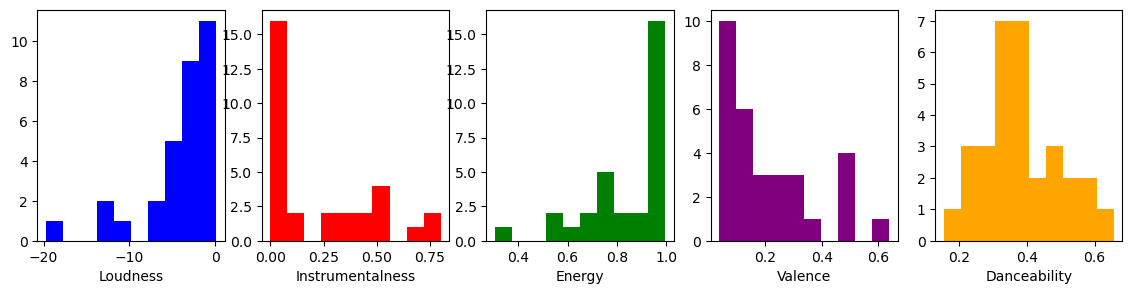

In [353]:
fig1, ax1 = plt.subplots(1,5, figsize = (14, 3))

ax1[0].hist(df_compare['loudness'], color = 'blue')
ax1[1].hist(df_compare['instrumentalness'], color = 'red')
ax1[2].hist(df_compare['energy'], color = 'green')
ax1[3].hist(df_compare['valence'], color = 'purple')
ax1[4].hist(df_compare['danceability'], color = 'orange')

ax1[0].set_xlabel('Loudness')
ax1[1].set_xlabel('Instrumentalness')
ax1[2].set_xlabel('Energy')
ax1[3].set_xlabel('Valence')
ax1[4].set_xlabel('Danceability')

plt.show()

These are histograms of the data from both albums combined. Just from this selection of histograms, there are some conclusions that can be made. One is that there is a similarity between the loudness and the energy categories for the two genres. Also, valence and instrumentalness have similar patterns as well. This alone can show the similarity between the vibes that Dubstep and Metal can bring, but I still need to know how the two genres look seperately, and see if these patterns translate into a scatterplot.

In [354]:
onyx = df_compare[df_compare['artist'] == 'Excision']
nyk = df_compare[df_compare['artist'] == 'Slipknot']

I have to separate the artists by their songs in the graph by taking the large dataframe and assigning each song to an artist.

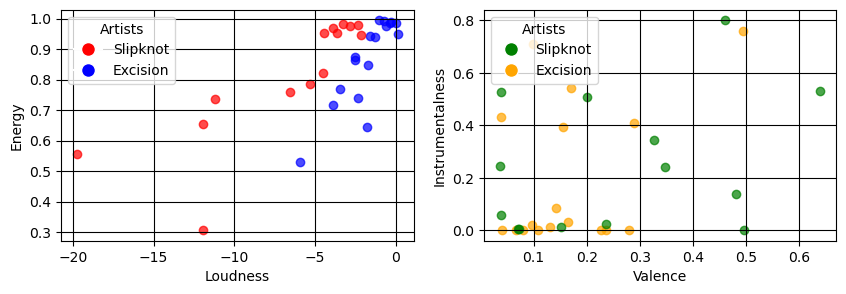

In [355]:
fig2, ax2 = plt.subplots(1,2, figsize = (10, 3))

ax2[0].scatter(onyx['loudness'], onyx['energy'], color = 'blue', alpha = .7)
ax2[0].scatter(nyk['loudness'], nyk['energy'], color = 'red', alpha = .7)

ax2[1].scatter(onyx['valence'], onyx['instrumentalness'], color = 'orange', alpha = .7)
ax2[1].scatter(nyk['valence'], nyk['instrumentalness'], color = 'green', alpha = .7)

ax2[0].set_xlabel('Loudness')
ax2[0].set_ylabel('Energy')

ax2[0].grid(True, color = 'black')

ax2[1].set_xlabel('Valence')
ax2[1].set_ylabel('Instrumentalness')

plt.grid(True, color = 'black')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in ['red', 'blue']]

ax2[0].legend(handles, ['Slipknot', 'Excision'], title="Artists", loc='upper left')

handles2 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in ['green', 'orange']]

ax2[1].legend(handles2, ['Slipknot', 'Excision'], title="Artists", loc='upper left')


plt.show()

This big chunk of code allows me to create these scatterplots, as well as the legends that show which color dots belong to which artist. After doing so, the two scatter plots show interesting results. The first one shows that the two artist's songs have both similar loudness and energy to them. The second graph, on the other hand, shows a mixed bag of results when it comes to the songs' valence and instrumentalness. It shows that Slipknot's music varies more with instrumentation and feeling, while Excision's songs are overall much less intrumental based and have a more negative mood to them.

# __Conclusion__

These findings show many things about the relationship between Dubstep and Metal, including their similarities and differences. My hypothesis was stated that I believed that the results would show that the two genres are more similar than different in the feelings and vibes they envoke. The histograms displayed results that supported my hypothesis, with two of the graphs having similar patterns. Because of this, I assumed that the same pattern would translate to the scatterplots. In a way, I was correct in my hypothesis since the energy and volume that the two genres displayed was similar to each other. However, what I did not expect is that the feelings that the songs invoke through their valence and the instrumentalness were not very similar to each other. There are some things that this analysis does not take into account. These findings do not indicate overall patterns for dubstep and metal, as I tested only two artists. Additionally, I could have tested the correlations between other categories in the data frame.